In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn import neighbors
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [2]:
books = pd.read_csv('Books.csv')
books.shape

/Users/prajaktaghumatkar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(271360, 8)

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings = pd.read_csv('Ratings.csv')
ratings.shape

(1149780, 3)

In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users = pd.read_csv('Users.csv')
users.shape

(278858, 3)

In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [10]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [11]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [12]:
book_ratings = pd.merge(left=books, right=ratings, how='left', left_on='ISBN', right_on='ISBN')
book_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating'],
      dtype='object')

In [13]:
book_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0


In [14]:
book_ratings.shape

(1032345, 10)

In [15]:
book_ratings.isnull().sum().sum()

2425

In [16]:
book_ratings = book_ratings.dropna()
book_ratings.shape

(1031129, 10)

In [17]:
book_ratings_users = pd.merge(left=book_ratings, right=users, how='right', left_on='User-ID', right_on='User-ID')
book_ratings_users.shape

(1217881, 12)

In [18]:
book_ratings_users_t = book_ratings_users.copy()
book_ratings_users_t.describe()

,User-ID,Book-Rating,Age
count,1.217881e+06,1.031129e+06,867505.000000
mean,1.404038e+05,2.839039e+00,36.984160
std,8.051888e+04,3.854152e+00,14.153954
min,1.000000e+00,0.000000e+00,0.000000
25%,7.033800e+04,0.000000e+00,28.000000
50%,1.408520e+05,0.000000e+00,35.000000
75%,2.111520e+05,7.000000e+00,45.000000
max,2.788580e+05,1.000000e+01,244.000000


In [19]:
book_ratings_users_t = book_ratings_users.copy()
book_ratings_users_t.drop(book_ratings_users_t.describe(),axis='columns').describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location
count,1031129,1031129,1031129,1031129,1031129,1031129,1031129,1031129,1217881
unique,270145,241066,101585,200,16725,269836,269836,269836,57339
top,0971880107,Wild Animus,Stephen King,2002,Ballantine Books,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"toronto, ontario, canada"
freq,2502,2502,10053,87275,34724,2502,2502,2502,16162


In [20]:
print("Percentage of null values in each field")

for column in book_ratings_users.columns:
    print(column," has ",np.round(book_ratings_users[column].isnull().mean()*100,2),"% of null values") 


Percentage of null values in each field
ISBN  has  15.33 % of null values
Book-Title  has  15.33 % of null values
Book-Author  has  15.33 % of null values
Year-Of-Publication  has  15.33 % of null values
Publisher  has  15.33 % of null values
Image-URL-S  has  15.33 % of null values
Image-URL-M  has  15.33 % of null values
Image-URL-L  has  15.33 % of null values
User-ID  has  0.0 % of null values
Book-Rating  has  15.33 % of null values
Location  has  0.0 % of null values
Age  has  28.77 % of null values


In [21]:
book_ratings_users = book_ratings_users.dropna()

In [22]:
book_ratings_users.shape

(753296, 12)

In [23]:
book_ratings_users.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [24]:
user_id_dict = {'User-ID':int}
book_ratings_users = book_ratings_users.astype(user_id_dict)

In [25]:
book_ratings_users = book_ratings_users.reset_index().drop('index',axis=1)

In [26]:
#book_ratings_users = book_ratings_users.drop('level_0',axis=1)
book_ratings_users.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0.0,"stockton, california, usa",18.0
1,1841721522,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,10,0.0,"albacete, wisconsin, spain",26.0
2,0375759778,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,19,7.0,"weston, ,",14.0
3,0425163091,Chocolate Jesus,Stephan Jaramillo,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...,20,0.0,"langhorne, pennsylvania, usa",19.0
4,067176537X,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979,Fireside,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,36,0.0,"montreal, quebec, canada",24.0


Text(0.5, 1.0, 'Distribution of Ratings')

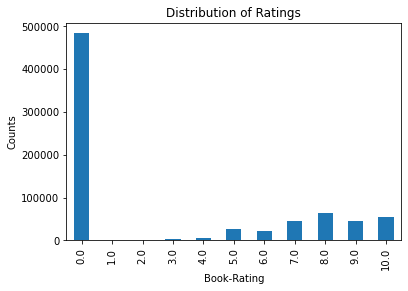

In [27]:
import matplotlib.pyplot as plt


book_ratings_users.groupby('Book-Rating')['ISBN'].count().plot.bar()
plt.xlabel("Book-Rating")
plt.ylabel("Counts")
plt.title("Distribution of Ratings")

In [28]:
#Popular 20 Books
print("################# Book Title #################  ################# Ratings ######################")
book_ratings_users.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)[:20]

################# Book Title #################  ################# Ratings ######################


Book-Title
Wild Animus                                                         2141
The Lovely Bones: A Novel                                            920
The Da Vinci Code                                                    708
Bridget Jones's Diary                                                599
The Nanny Diaries: A Novel                                           573
Angels &amp; Demons                                                  552
The Secret Life of Bees                                              547
A Painted House                                                      517
Life of Pi                                                           516
Divine Secrets of the Ya-Ya Sisterhood: A Novel                      514
The Red Tent (Bestselling Backlist)                                  472
The Notebook                                                         456
Harry Potter and the Chamber of Secrets (Book 2)                     425
The Pelican Brief                       

Text(0.5, 1.0, 'Count of Ratings of Popular Books')

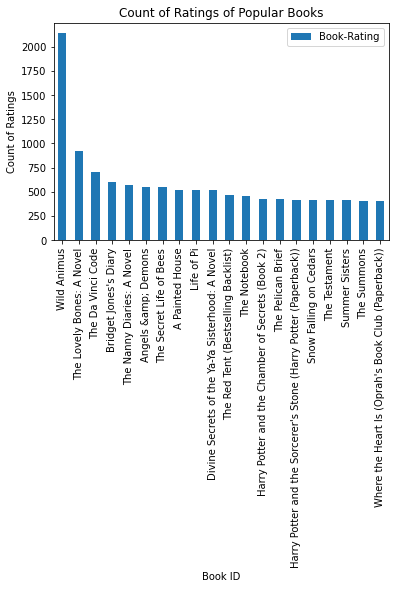

In [29]:
book_ratings_users.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)[:20].plot.bar()
plt.xlabel("Book ID")
plt.ylabel("Count of Ratings")
plt.legend()
plt.title("Count of Ratings of Popular Books")

In [30]:
book_ratings_users_1 = book_ratings_users.copy()
book_ratings_users_1 = book_ratings_users_1[book_ratings_users_1['Book-Rating']>6]
popular_authors = book_ratings_users_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:20].index
popular_authors

Index(['Stephen King', 'Nora Roberts', 'John Grisham', 'J. K. Rowling',
       'James Patterson', 'Janet Evanovich', 'Dean R. Koontz',
       'Mary Higgins Clark', 'Dan Brown', 'Anne Rice', 'Sue Grafton',
       'Michael Crichton', 'Nicholas Sparks', 'JOHN GRISHAM', 'Alice Sebold',
       'Terry Pratchett', 'Tom Clancy', 'Anne McCaffrey',
       'William Shakespeare', 'Neil Gaiman'],
      dtype='object', name='Book-Author')

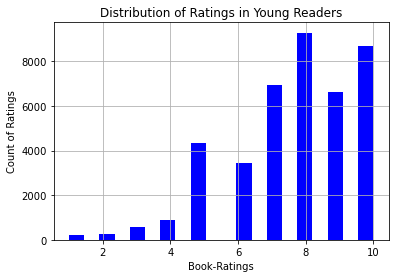

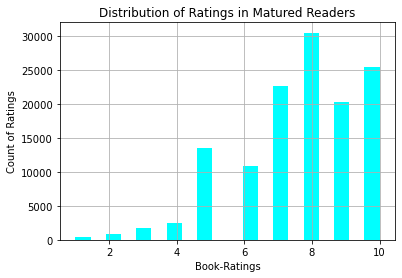

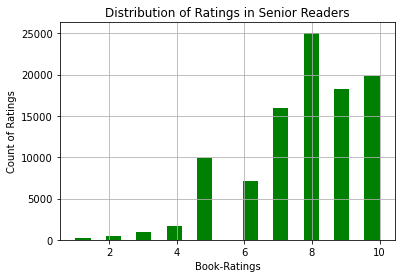

In [31]:
book_ratings_users_2 = book_ratings_users.copy()
book_ratings_users_2 = book_ratings_users_2[book_ratings_users_2['Book-Rating']!=0]
young_readers = book_ratings_users_2[book_ratings_users_2['Age']<25]
matured_readers = book_ratings_users_2[(book_ratings_users_2['Age']>=25) & (book_ratings_users_2['Age']<40)]
senior_readers = book_ratings_users_2[book_ratings_users_2['Age']>=40]

young_readers['Book-Rating'].hist(bins=20,color="blue")
plt.xlabel("Book-Ratings")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings in Young Readers")
plt.show()

matured_readers['Book-Rating'].hist(bins=20,color="cyan")
plt.xlabel("Book-Ratings")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings in Matured Readers")
plt.show()

senior_readers['Book-Rating'].hist(bins=20,color="green")
plt.xlabel("Book-Ratings")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings in Senior Readers")
plt.show()

Top 5 Authors' Book Ratings distribution among young readers


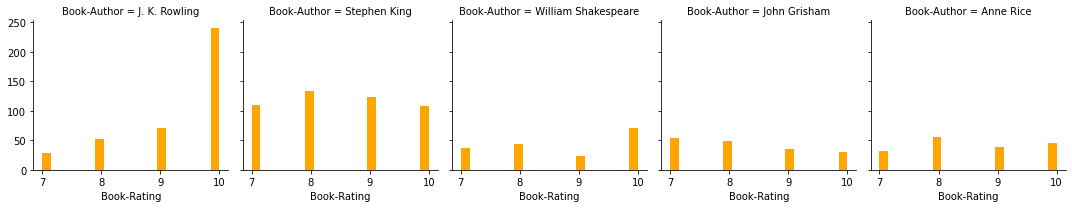

In [32]:
young_readers_1 = young_readers.copy()
young_readers_1 = young_readers_1[young_readers_1['Book-Rating']>6]
popular_authors_young = young_readers_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among young readers")
young_readers_1 = young_readers_1[young_readers_1['Book-Author'].isin(popular_authors_young)]
graph = sns.FacetGrid(young_readers_1,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='orange')
plt.show()



Top 5 Authors' Book Ratings distribution among matured readers


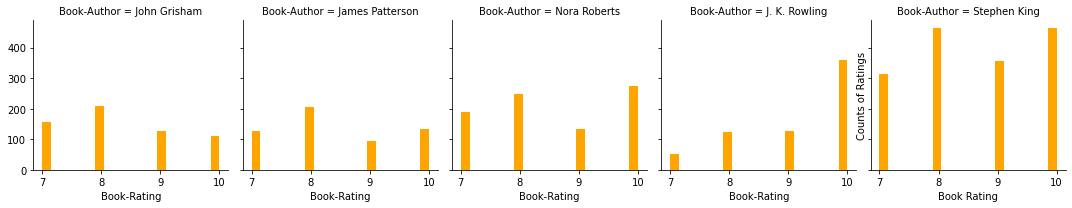

In [33]:
matured_readers_1 = matured_readers.copy()
matured_readers_1 = matured_readers_1[matured_readers_1['Book-Rating']>6]
popular_authors_matured = matured_readers_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among matured readers")
matured_readers_1 = matured_readers_1[matured_readers_1['Book-Author'].isin(popular_authors_matured)]
graph = sns.FacetGrid(matured_readers_1,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='orange')
plt.xlabel("Book Rating")
plt.ylabel("Counts of Ratings")
plt.show()




Top 5 Authors' Book Ratings distribution among senior readers


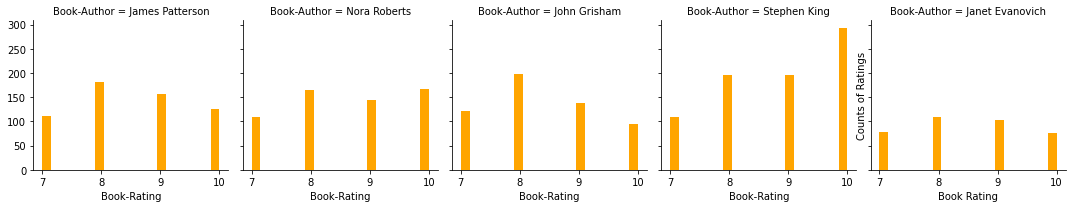

In [34]:
senior_readers_1 = senior_readers.copy()
senior_readers_1 = senior_readers_1[senior_readers_1['Book-Rating']>6]
popular_authors_senior = senior_readers_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among senior readers")
senior_readers_1 = senior_readers_1[senior_readers_1['Book-Author'].isin(popular_authors_senior)]
graph = sns.FacetGrid(senior_readers_1,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='orange')
plt.xlabel("Book Rating")
plt.ylabel("Counts of Ratings")
plt.show()




Top 10 Publishers' Book Ratings distribution


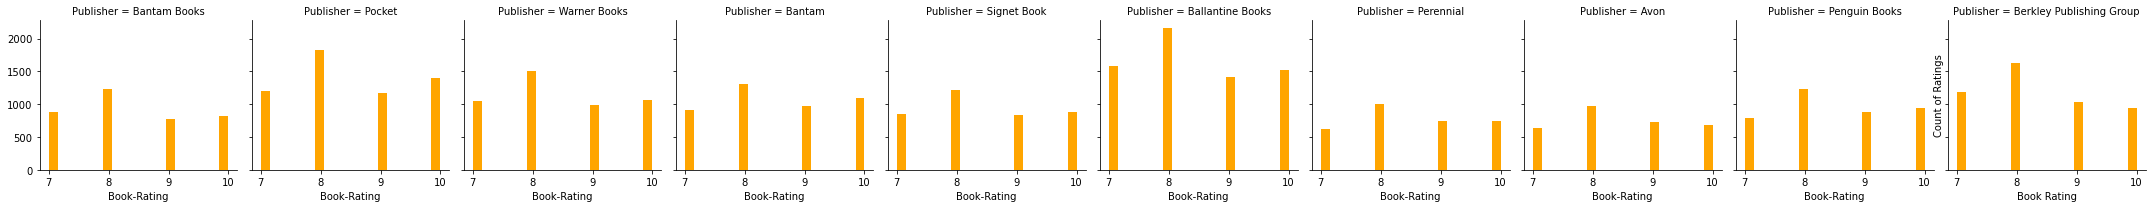

In [35]:
book_ratings_users_1 = book_ratings_users.copy()
book_ratings_users_1 = book_ratings_users_1[book_ratings_users_1['Book-Rating']>6]
popular_publishers = book_ratings_users_1.groupby('Publisher')['ISBN'].count().sort_values(ascending=False)[:10].index

print("Top 10 Publishers' Book Ratings distribution")
book_ratings_users_1 = book_ratings_users_1[book_ratings_users_1['Publisher'].isin(popular_publishers)]
graph = sns.FacetGrid(book_ratings_users_1,col='Publisher')
graph.map(plt.hist,'Book-Rating',bins=20,color='orange')
plt.xlabel("Book Rating")
plt.ylabel("Count of Ratings")
plt.show()

In [36]:
item_book_ratings = book_ratings_users.groupby(['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']).agg(ratings_count = ('User-ID','count'),avg_rating=('Book-Rating','mean')).round(2)
item_book_ratings = item_book_ratings.reset_index(level=['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'])
item_book_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'ratings_count', 'avg_rating'],
      dtype='object')

In [38]:
len(item_book_ratings)

228996

In [39]:
item_book_ratings = item_book_ratings[item_book_ratings['Book-Author']!='Not Applicable (Na )']

In [40]:
np.mean(item_book_ratings[['avg_rating']])

avg_rating    2.822627
dtype: float64

In [41]:
np.mean(item_book_ratings[['ratings_count']])

ratings_count    3.291416
dtype: float64

In [42]:
top_rated_books = item_book_ratings[(item_book_ratings['avg_rating']>2.82) & (item_book_ratings['ratings_count']>3.28)]
top_rated_books = top_rated_books.sort_values(by='avg_rating',ascending=False).head(20)
top_rated_books.head(2)

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating
4287,0060280034,Dinotopia: A Land Apart from Time (Dinotopia),James Gurney,HarperCollins,http://images.amazon.com/images/P/0060280034.0...,http://images.amazon.com/images/P/0060280034.0...,http://images.amazon.com/images/P/0060280034.0...,4,10.0
17061,014050639X,Each Peach Pear Plum (Picture Puffins),Janet Ahlberg,Puffin Books,http://images.amazon.com/images/P/014050639X.0...,http://images.amazon.com/images/P/014050639X.0...,http://images.amazon.com/images/P/014050639X.0...,4,10.0


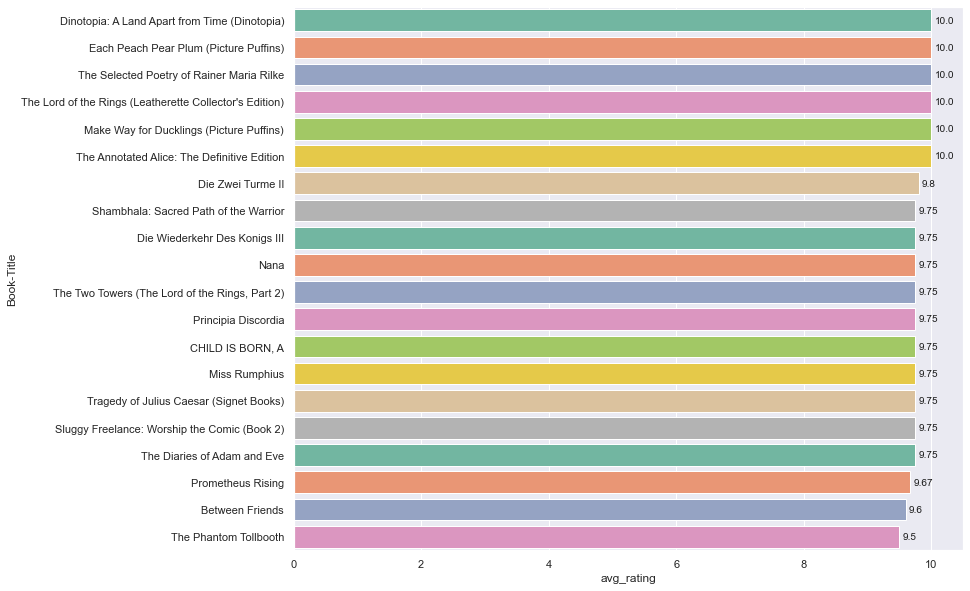

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='avg_rating',y='Book-Title',data=top_rated_books,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.show()

In [44]:
top_voted_books = item_book_ratings.sort_values(by='ratings_count',ascending=False).head(20)


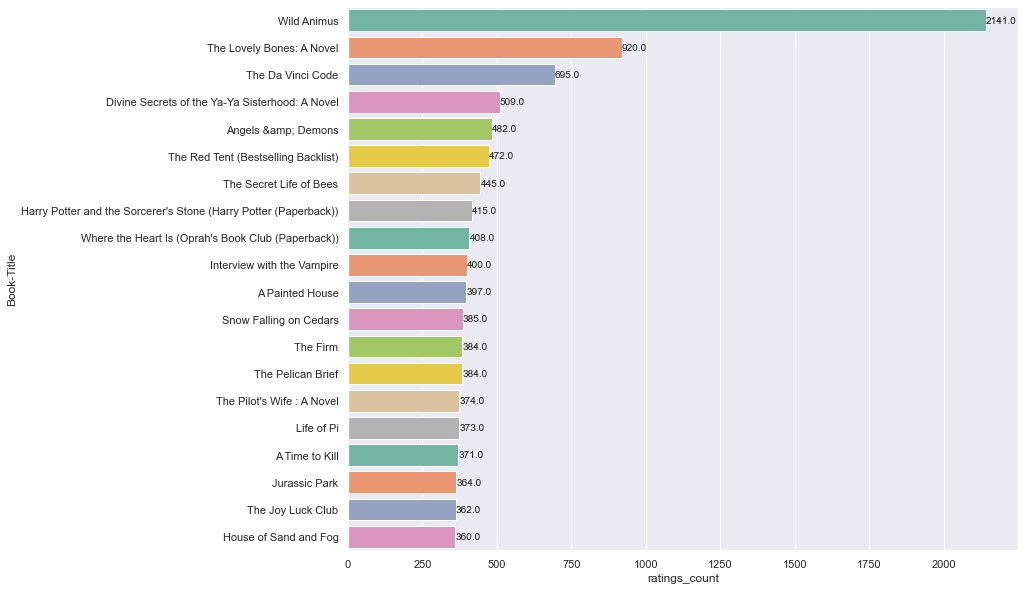

In [45]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='ratings_count',y='Book-Title',data=top_voted_books,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.show()

# Top Voted but not Top Rated

In [46]:
list(set(top_voted_books['Book-Title'])-set(top_rated_books['Book-Title']))

['The Red Tent (Bestselling Backlist)',
 'The Lovely Bones: A Novel',
 'A Painted House',
 'Interview with the Vampire',
 'Jurassic Park',
 'The Secret Life of Bees',
 'Wild Animus',
 'The Firm',
 'The Pelican Brief',
 'Angels &amp; Demons',
 'Snow Falling on Cedars',
 'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
 'Life of Pi',
 'The Da Vinci Code',
 "Where the Heart Is (Oprah's Book Club (Paperback))",
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'A Time to Kill',
 'The Joy Luck Club',
 "The Pilot's Wife : A Novel",
 'House of Sand and Fog']

# Top Rated but not top Voted

In [47]:
list(set(top_rated_books['Book-Title'])-set(top_voted_books['Book-Title']))

['Sluggy Freelance: Worship the Comic (Book 2)',
 'Between Friends',
 'Each Peach Pear Plum (Picture Puffins)',
 'Tragedy of Julius Caesar (Signet Books)',
 'The Phantom Tollbooth',
 'Miss Rumphius',
 'The Annotated Alice: The Definitive Edition',
 'Die Zwei Turme II',
 'The Two Towers (The Lord of the Rings, Part 2)',
 'Prometheus Rising',
 'Make Way for Ducklings (Picture Puffins)',
 'Principia Discordia',
 'The Selected Poetry of Rainer Maria Rilke',
 'Shambhala: Sacred Path of the Warrior',
 'The Diaries of Adam and Eve',
 'Die Wiederkehr Des Konigs III',
 "The Lord of the Rings (Leatherette Collector's Edition)",
 'Dinotopia: A Land Apart from Time (Dinotopia)',
 'Nana',
 'CHILD IS BORN, A']

# Relationship between Rating and Vote

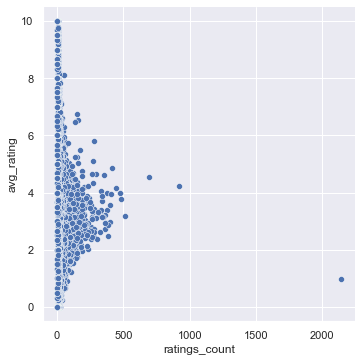

In [48]:
ax = sns.relplot(x='ratings_count',y='avg_rating',data= item_book_ratings,marker='o')

As the rating count increases the mean of ratings is getting in between 2 to 4

In [49]:
item_book_ratings['Book-Author'].unique()

array(['C. van Amerongen (translator)', 'Judith Kerr', 'Helen Forrester',
       ..., 'Mark Shepard', 'Rachel Abramowitz',
       'P Ed Varnedoe/Antonelli Kick'], dtype=object)

In [50]:
def get_only_author(authors):
    return authors.split('/')[0]

In [51]:
df_only_author = item_book_ratings.copy()

In [52]:
df_only_author['pr_author'] = df_only_author['Book-Author'].apply(lambda x: get_only_author(x))


In [53]:
len(df_only_author)

228762

In [54]:
total_rating = df_only_author.drop_duplicates(subset=['pr_author', 'Book-Title'], keep='first')
len(total_rating)

212307

In [55]:
total_ratings = df_only_author.groupby('pr_author').agg(total_ratings=('avg_rating','sum')).reset_index()
total_ratings = total_ratings.sort_values(by='total_ratings',ascending=False)
total_ratings

,pr_author,total_ratings
86300,William Shakespeare,2102.78
78004,Stephen King,1792.61
934,Agatha Christie,1600.69
80900,Terry Pratchett,1142.94
34155,Isaac Asimov,946.42
...,...,...
40703,Joanne Gise,0.00
40706,Joanne H. Meehl,0.00
40708,Joanne Hatch Bruch,0.00
40709,Joanne Hollows,0.00


In [56]:
total_books = df_only_author.groupby('pr_author').agg(total_books=('Book-Title','nunique')).reset_index()
total_books = total_books.sort_values(by='total_books',ascending=False)
total_books

,pr_author,total_books
86300,William Shakespeare,448
934,Agatha Christie,436
3926,Ann M. Martin,338
26193,Francine Pascal,319
11572,Carolyn Keene,309
...,...,...
34213,Isabelle Hausser,1
34215,Isabelle Knockwood,1
34216,Isabelle Muller,1
34217,Isabelle Patrick,1


In [57]:
np.max(total_books['total_books'])

448

In [58]:
avg_r_by_author = pd.merge(total_ratings, total_books, on = 'pr_author', how ='outer')
avg_r_by_author = avg_r_by_author[avg_r_by_author['total_books']>150]
avg_r_by_author['avg_rat_by_a'] = np.round(avg_r_by_author['total_ratings']/avg_r_by_author['total_books'],2)
avg_r_by_author = avg_r_by_author.sort_values(by='avg_rat_by_a',ascending=False)
avg_r_by_author

,pr_author,total_ratings,total_books,avg_rat_by_a
1,Stephen King,1792.61,277,6.47
3,Terry Pratchett,1142.94,191,5.98
6,Mark Twain,773.03,155,4.99
0,William Shakespeare,2102.78,448,4.69
8,Marion Zimmer Bradley,710.59,171,4.16
4,Isaac Asimov,946.42,256,3.70
2,Agatha Christie,1600.69,436,3.67
15,Mary Higgins Clark,553.85,154,3.60
13,Piers Anthony,603.90,169,3.57
16,Diana Palmer,550.09,155,3.55


# Weighted Rating Calculation

In [59]:
total_vote = df_only_author.drop_duplicates(subset=['pr_author', 'Book-Title'], keep='first')
total_vote.reset_index(inplace=True)
total_vote = total_vote[['pr_author', 'Book-Title', 'avg_rating', 'ratings_count']]
total_vote

,pr_author,Book-Title,avg_rating,ratings_count
0,C. van Amerongen (translator),The Way Things Work: An Illustrated Encycloped...,8.0,1
1,Judith Kerr,Mog's Christmas,0.0,1
2,Helen Forrester,Twopence to Cross the Mersey,0.0,1
3,Muriel Spark,The Prime of Miss Jean Brodie,0.0,1
4,Jeffrey Archer,Matter Of Honour,0.0,1
...,...,...,...,...
212302,Bruce Wagner,I'll Let You Go: A Novel,0.0,1
212303,David Rakoff,Fraud,9.0,1
212304,Elizabeth Buchan,"Good Wife Strikes Back, The",0.0,1
212305,Jules Verne,The Blockade Runners,0.0,1


In [60]:
C = total_vote.avg_rating.mean()
C

2.826497383505954

In [61]:
m = total_vote.ratings_count.quantile(0.9998)
m

214.07760000001872

In [62]:
total_vote = total_vote[total_vote.ratings_count>=m]
total_vote.head()

,pr_author,Book-Title,avg_rating,ratings_count
4409,Rebecca Wells,The Divine Secrets of the Ya-Ya Sisterhood: A ...,3.30,269
5900,Rebecca Wells,Divine Secrets of the Ya-Ya Sisterhood: A Novel,3.17,509
5963,Barbara Kingsolver,The Poisonwood Bible: A Novel,3.31,321
6051,Ann Patchett,Bel Canto: A Novel,3.56,233
6143,Eric Schlosser,Fast Food Nation: The Dark Side of the All-Ame...,3.73,222


In [63]:
def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['avg_rating']
    return np.round(((v * R) + (m * C))/(m + v),2)

In [64]:
total_vote['weighted_rating'] = total_vote.apply(weighted_rating,axis=1)

<ipython-input-64-fc4890853217>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_vote['weighted_rating'] = total_vote.apply(weighted_rating,axis=1)


In [65]:
total_vote = total_vote.sort_values(by='weighted_rating',ascending=False).head(20)
total_vote.head()

,pr_author,Book-Title,avg_rating,ratings_count,weighted_rating
68447,J. K. Rowling,Harry Potter and the Order of the Phoenix (Boo...,5.80,280,4.51
99327,J. K. Rowling,Harry Potter and the Sorcerer's Stone (Harry P...,4.85,415,4.16
58121,Dan Brown,The Da Vinci Code,4.53,695,4.13
30861,Alice Sebold,The Lovely Bones: A Novel,4.24,920,3.97
133596,Mitch Albom,The Five People You Meet in Heaven,4.61,356,3.94


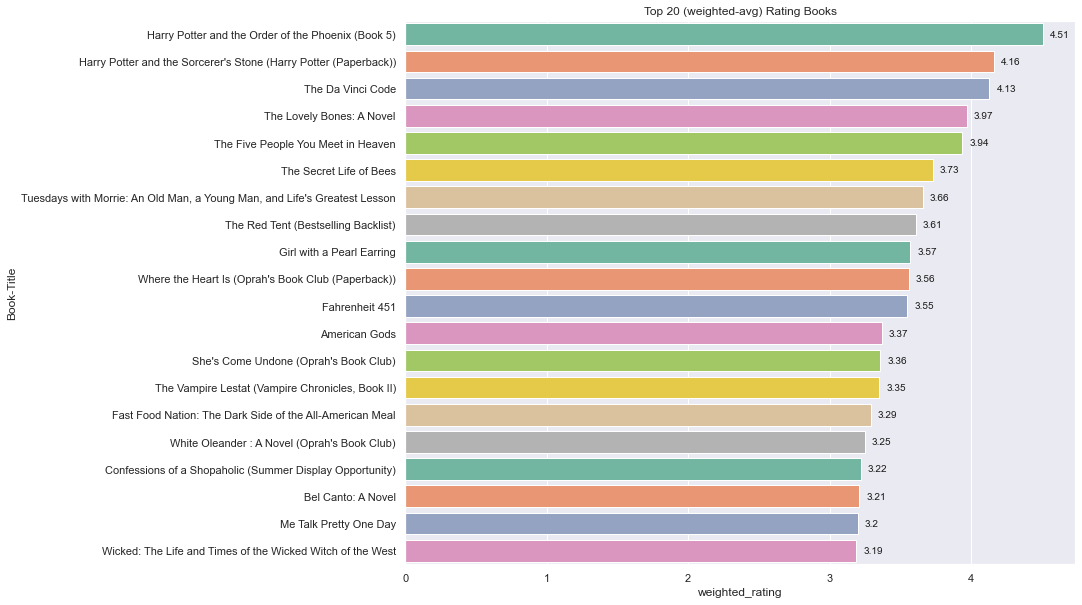

In [66]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='weighted_rating',y='Book-Title',data=total_vote,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.title("Top 20 (weighted-avg) Rating Books")
plt.show()

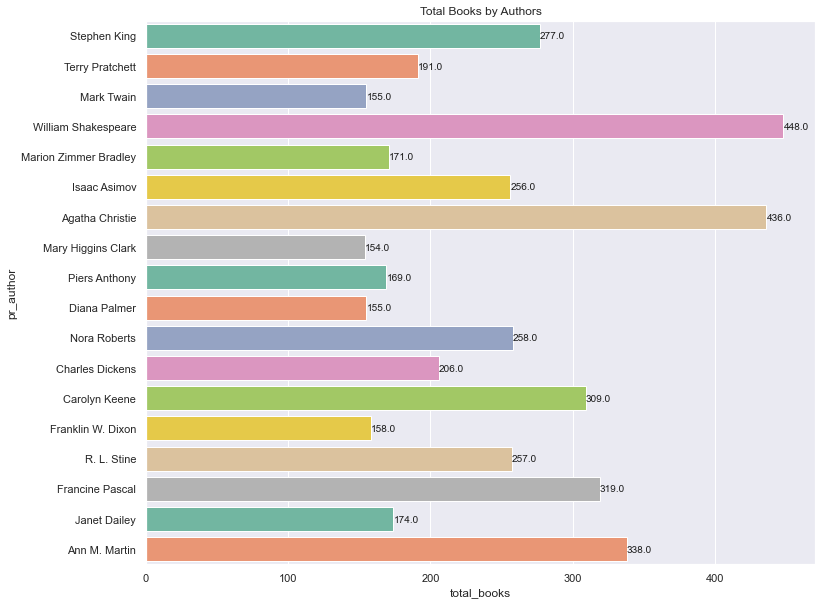

In [67]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='total_books',y='pr_author',data=avg_r_by_author,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.title("Total Books by Authors")
plt.show()

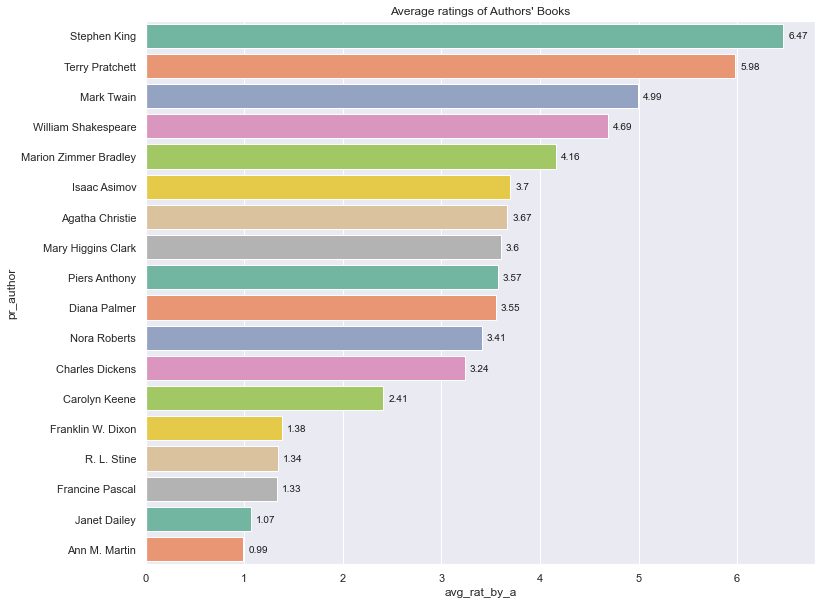

In [68]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='avg_rat_by_a',y='pr_author',data=avg_r_by_author,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.title("Average ratings of Authors' Books")
plt.show()

In [69]:
pip install wordcloud


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [70]:
titles = item_book_ratings['Book-Title'].unique()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

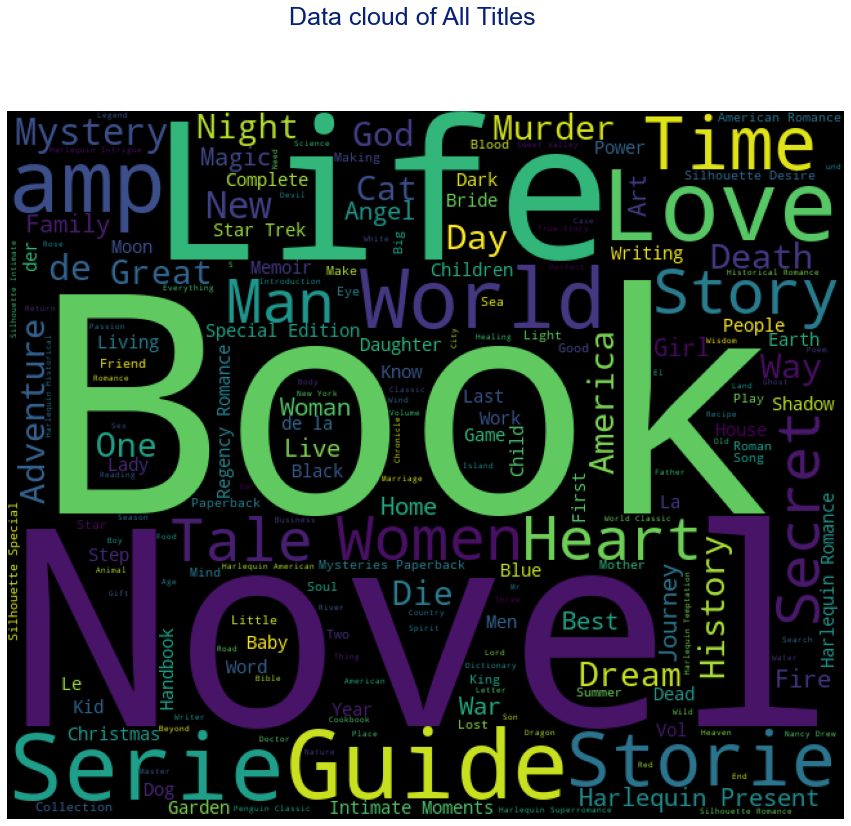

In [71]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='#000',
                          width=650,
                          height=550,
                          stopwords=STOPWORDS,
                         ).generate(" ".join(titles))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.91,'Data cloud of All Titles', color='#062175', fontsize=25, ha='center')
plt.show()

# Item-Based Recommendation Engine

In [72]:
# Creating rating_between new feature
df_only_author.loc[ (df_only_author['avg_rating'] >= 0) & (df_only_author['avg_rating'] <= 1), 'rating_between'] = "between_0_to_1"
df_only_author.loc[ (df_only_author['avg_rating'] > 1) & (df_only_author['avg_rating'] <= 2), 'rating_between'] = "between_1_to_2"
df_only_author.loc[ (df_only_author['avg_rating'] > 2) & (df_only_author['avg_rating'] <= 3), 'rating_between'] = "between_2_to_3"
df_only_author.loc[ (df_only_author['avg_rating'] > 3) & (df_only_author['avg_rating'] <= 4), 'rating_between'] = "between_3_to_4"
df_only_author.loc[ (df_only_author['avg_rating'] > 4) & (df_only_author['avg_rating'] <= 5), 'rating_between'] = "between_4_to_5"
df_only_author.loc[ (df_only_author['avg_rating'] > 5) & (df_only_author['avg_rating'] <= 6), 'rating_between'] = "between_5_to_6"
df_only_author.loc[ (df_only_author['avg_rating'] > 6) & (df_only_author['avg_rating'] <= 7), 'rating_between'] = "between_6_to_7"
df_only_author.loc[ (df_only_author['avg_rating'] > 7) & (df_only_author['avg_rating'] <= 8), 'rating_between'] = "between_7_to_8"
df_only_author.loc[ (df_only_author['avg_rating'] > 8) & (df_only_author['avg_rating'] <= 9), 'rating_between'] = "between_8_to_9"
df_only_author.loc[ (df_only_author['avg_rating'] > 9) & (df_only_author['avg_rating'] <= 10), 'rating_between'] = "between_9_to_10"


In [73]:
df_only_author.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating,pr_author,rating_between
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,1,8.0,C. van Amerongen (translator),between_7_to_8
1,0001010565,Mog's Christmas,Judith Kerr,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,1,0.0,Judith Kerr,between_0_to_1
2,0001046713,Twopence to Cross the Mersey,Helen Forrester,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,1,0.0,Helen Forrester,between_0_to_1
3,0001046934,The Prime of Miss Jean Brodie,Muriel Spark,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,1,0.0,Muriel Spark,between_0_to_1
4,0001047663,Matter Of Honour,Jeffrey Archer,Trafalgar Square Books,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,1,0.0,Jeffrey Archer,between_0_to_1


In [74]:

trial = df_only_author[['avg_rating', 'ratings_count']]
data_model = np.asarray([np.asarray(trial['avg_rating']), np.asarray(trial['ratings_count'])]).T
data_model

array([[8., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [75]:
from sklearn.cluster import KMeans

# Elbow Method
score = []
x = data_model
for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

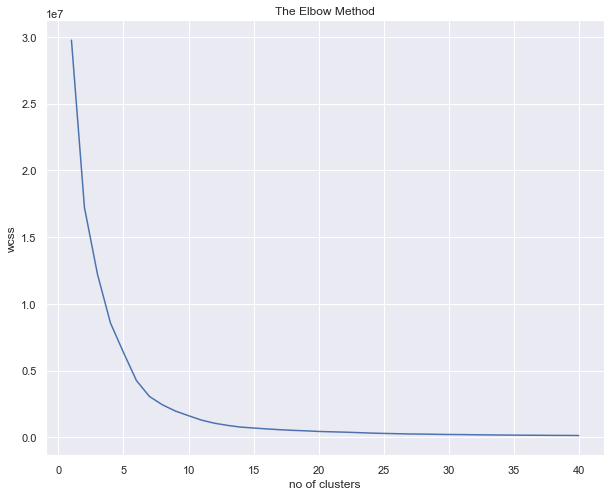

In [76]:
# plotting the score
plt.figure(figsize=(10, 8))
plt.plot(range(1,41), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [77]:
rating_between_df = df_only_author['rating_between'].str.get_dummies(sep=",")
rating_between_df.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5,between_5_to_6,between_6_to_7,between_7_to_8,between_8_to_9,between_9_to_10
0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [78]:
engine_features = pd.concat([rating_between_df,df_only_author['avg_rating'],df_only_author['ratings_count']],axis=1)
engine_features.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5,between_5_to_6,between_6_to_7,between_7_to_8,between_8_to_9,between_9_to_10,avg_rating,ratings_count
0,0,0,0,0,0,0,0,1,0,0,8.0,1
1,1,0,0,0,0,0,0,0,0,0,0.0,1
2,1,0,0,0,0,0,0,0,0,0,0.0,1
3,1,0,0,0,0,0,0,0,0,0,0.0,1
4,1,0,0,0,0,0,0,0,0,0,0.0,1


In [79]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
engine_features_scaled = min_max_scaler.fit_transform(engine_features)

In [80]:
from sklearn import neighbors
engine_model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
engine_model.fit(engine_features_scaled)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [81]:
dist, idlist = engine_model.kneighbors(engine_features_scaled)
idlist

array([[  1040,    574,   2938,   1326,   1766,   1052],
       [ 10513,  85387,  34060, 228761,  85891,  85386],
       [ 10513,  85387,  34060, 228761,  85891,  85386],
       ...,
       [ 10513,  85387,  34060, 228761,  85891,  85386],
       [ 10513,  85387,  34060, 228761,  85891,  85386],
       [ 10513,  85387,  34060, 228761,  85891,  85386]])

In [82]:
def book_recommendation_engine(book_name):
    book_list_name = []
    book_id = df_only_author[df_only_author['Book-Title'] == book_name].index
    book_id = book_id[0]

    for sim_b_id in idlist[book_id]:
        book_list_name.append(df_only_author.loc[sim_b_id]['Book-Title'])
    return book_list_name

In [83]:
book_list_name = book_recommendation_engine('The Lovely Bones: A Novel')
book_list_name[1:]

['A Scandalous Lady',
 'Rhode Island Red (Nanette Hayes Mysteries)',
 'The Dream Hunter',
 'The Peppered Moth',
 'Fear Nothing']

# User-Based Collaborative Filtering Recommendation System

In [84]:
title_counts = pd.DataFrame(book_ratings_users["Book-Title"].value_counts())
rare_books = title_counts[title_counts["Book-Title"] <= 100].index
common_books = book_ratings_users[~book_ratings_users["Book-Title"].isin(rare_books)]

In [85]:
common_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
5,0553582747,From the Corner of His Eye,Dean Koontz,2001,Bantam Books,http://images.amazon.com/images/P/0553582747.0...,http://images.amazon.com/images/P/0553582747.0...,http://images.amazon.com/images/P/0553582747.0...,42,7.0,"appleton, wisconsin, usa",17.0
6,0425182908,Isle of Dogs,Patricia Cornwell,2002,Berkley Publishing Group,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,44,0.0,"black mountain, north carolina, usa",51.0
11,0440225701,The Street Lawyer,JOHN GRISHAM,1999,Dell,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,51,9.0,"renton, washington, usa",34.0
18,042511774X,Breathing Lessons,Anne Tyler,1994,Berkley Publishing Group,http://images.amazon.com/images/P/042511774X.0...,http://images.amazon.com/images/P/042511774X.0...,http://images.amazon.com/images/P/042511774X.0...,67,0.0,"framingham, massachusetts, usa",43.0
19,0804106304,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,67,0.0,"framingham, massachusetts, usa",43.0


We obtained the new dataset after removing rare books

User-based collaborative filtering makes recommendations based on user-book interactions in the past. The assumption behind the algorithm is that similar users like similar books.

User-based collaborative filtering algorithm usually has the following steps:

1. Find similar users based on interactions with common items.

2. Identify the Books rated high by similar users but have not been exposed to the active user of interest.

3. Calculate the weighted average score for each item.

4. Rank items based on the score and pick the top n items to recommend.

In [86]:
#First we are creating user-book pivot table

user_book_pivot = common_books.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating')
user_book_pivot.head(5)

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Fine Balance,A Heartbreaking Work of Staggering Genius,...,Wild Animus,Winter Moon,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Now we choose a random user to get the similar users
random_user = int(pd.Series(user_book_pivot.index).sample(1).values)
random_user = 144531
random_user_df = user_book_pivot[user_book_pivot.index == random_user]
random_user_df

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Fine Balance,A Heartbreaking Work of Staggering Genius,...,Wild Animus,Winter Moon,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
144531,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
random_user_books = random_user_df.columns[random_user_df.notna().any()].tolist()
random_user_books

['4 Blondes',
 'A Painted House',
 "A Thousand Acres (Ballantine Reader's Circle)",
 'A Time to Kill',
 'A Walk to Remember',
 'A Wrinkle In Time',
 'Airframe',
 'All Around the Town',
 'Anne of Green Gables (Anne of Green Gables Novels (Paperback))',
 'Back Roads',
 "Big Stone Gap: A Novel (Ballantine Reader's Circle)",
 'Blow Fly: A Scarpetta Novel',
 'Body of Lies',
 'Brave New World',
 'Breathing Lessons',
 'Carolina Moon',
 'Cat &amp; Mouse (Alex Cross Novels)',
 'Cold Mountain',
 'Cradle and All',
 'Daddy',
 "Daddy's Little Girl",
 'Dance upon the Air (Three Sisters Island Trilogy)',
 'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
 'Fall On Your Knees (Oprah #45)',
 'Four To Score (A Stephanie Plum Novel)',
 "Full House (Janet Evanovich's Full Series)",
 "Full Tilt (Janet Evanovich's Full Series)",
 'Girl in Hyacinth Blue',
 'Good in Bed',
 'Hannibal',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'Hideaway',
 'Hot Six : A Stephanie Plum Novel (A Steph

In [89]:
#Now we create a pivot table of all users for the books read by the random user

all_users_df = user_book_pivot[random_user_books]
all_users_df.head()

Book-Title,4 Blondes,A Painted House,A Thousand Acres (Ballantine Reader's Circle),A Time to Kill,A Walk to Remember,A Wrinkle In Time,Airframe,All Around the Town,Anne of Green Gables (Anne of Green Gables Novels (Paperback)),Back Roads,...,"The Vampire Lestat (Vampire Chronicles, Book II)",The Woman Next Door,Three To Get Deadly : A Stephanie Plum Novel (A Stephanie Plum Novel),Two for the Dough,Violets Are Blue,We'll Meet Again,"Welcome to the World, Baby Girl!",When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
read_cnts_by_user = all_users_df.T.notna().sum()
read_cnts_by_user = read_cnts_by_user.reset_index()
read_cnts_by_user.columns=['user_id','books_count']
read_cnts_by_user.head()

,user_id,books_count
0,42,0
1,44,1
2,51,0
3,67,1
4,75,0


In [91]:
# we are considering only those users who read 20% of books  that random user has read

perc_20 = 20 * len(random_user_books) / 100
same_b_r_users = read_cnts_by_user[read_cnts_by_user.books_count>perc_20]['user_id']
same_b_r_users.head()

214    3363
396    6251
424    6563
470    7158
487    7346
Name: user_id, dtype: int64

In [92]:
#here we are using corr() - to get the pairwise correlation of all the users
# Then we are doing unstack() to get the multi-level indexing 
#and sorting the correlation values and dropping the duplicates
all_n_rand_df = pd.concat([all_users_df[all_users_df.index.isin(same_b_r_users)],
                          random_user_df[random_user_books]])
correlation_df = all_n_rand_df.T.corr().unstack().sort_values().drop_duplicates()
correlation_df

User-ID  User-ID
78973    252071    -1.000000
51450    167471    -1.000000
247447   200674    -1.000000
98391    227520    -1.000000
236283   110912    -0.997241
                      ...   
266056   211426     1.000000
273979   241980     1.000000
21659    123981     1.000000
175003   265313     1.000000
3363     13552           NaN
Length: 4832, dtype: float64

In [93]:
correlation_df = pd.DataFrame(correlation_df,columns=['corr'])
correlation_df.index.names = ['user_id_1','user_id_2']
correlation_df = correlation_df.reset_index()
correlation_df.head()

,user_id_1,user_id_2,corr
0,78973,252071,-1.000000
1,51450,167471,-1.000000
2,247447,200674,-1.000000
3,98391,227520,-1.000000
4,236283,110912,-0.997241


In [94]:
#we are setting the threshold correlation as 0.3
threshold_cor = 0.2
top_sim_users = correlation_df[(correlation_df.user_id_1 == random_user) & (correlation_df['corr']>threshold_cor)][['user_id_2','corr']].reset_index(drop=True)
top_sim_users = top_sim_users.sort_values(by='corr',ascending=False)
top_sim_users

,user_id_2,corr
21,102967,0.480376
20,173415,0.444467
19,190925,0.442113
18,166123,0.432613
17,260897,0.408426
16,260897,0.408426
15,224764,0.404691
14,106225,0.403704
13,123981,0.395794
12,196077,0.373072


In [95]:
top_sim_users.rename(columns={'user_id_2':'User-ID'},inplace=True)
top_sim_users.head()

,User-ID,corr
21,102967,0.480376
20,173415,0.444467
19,190925,0.442113
18,166123,0.432613
17,260897,0.408426


In [96]:
top_sim_user_all_b = top_sim_users.merge(book_ratings_users[['ISBN','Book-Title','Image-URL-S','User-ID','Book-Rating']],how='inner')
top_sim_user_all_b['weighted-rating'] = top_sim_user_all_b['corr'] * top_sim_user_all_b['Book-Rating']
top_sim_user_all_b.head()

,User-ID,corr,ISBN,Book-Title,Image-URL-S,Book-Rating,weighted-rating
0,102967,0.480376,0440234743,The Testament,http://images.amazon.com/images/P/0440234743.0...,0.0,0.0
1,102967,0.480376,0345402871,Airframe,http://images.amazon.com/images/P/0345402871.0...,0.0,0.0
2,102967,0.480376,0345417623,Timeline,http://images.amazon.com/images/P/0345417623.0...,0.0,0.0
3,102967,0.480376,0553582909,Icebound,http://images.amazon.com/images/P/0553582909.0...,0.0,0.0
4,102967,0.480376,0671888587,I'll Be Seeing You,http://images.amazon.com/images/P/0671888587.0...,0.0,0.0


In [97]:
# now we calculate the avearage of weighted ratings for the books and recommend those which are on the top
recommend_books = top_sim_user_all_b.groupby('Book-Title').agg(weighted_rating = ('weighted-rating','mean')).reset_index().round(2)
recommend_books

,Book-Title,weighted_rating
0,Dark Justice,2.13
1,LA Gallinita Roja/the Little Red Hen,0.00
2,Murder of a Sleeping Beauty (Scumble River My...,1.91
3,"!Trato hecho!: Spanish for Real Life, Combined...",1.08
4,'A Hell of a Place to Lose a Cow': An American...,0.00
...,...,...
18579,operation : mistletoe (the special agents),1.70
18580,together by christmas,1.70
18581,why I'm like this : True Stories,0.00
18582,Â¡Cristina! confidencias de una rubia,0.00


In [98]:
threshold_wt_rating = 4
books_recommender = recommend_books[recommend_books.weighted_rating>threshold_wt_rating].sort_values('weighted_rating',ascending=False).head(10)
books_recommender

,Book-Title,weighted_rating
81,84 Charing Cross Road,4.44
6574,Hype and Glory,4.44
7426,Kissing the Gunner's Daughter,4.44
7760,Light and Illusion: The Hollywood Portraits of...,4.44
7787,Lilies of the Field,4.44
7934,"Looking for Mary Or, the Blessed Mother and Me",4.44
8005,Love &amp; Rockets: Heartbreak Soup,4.44
8123,Lullaby: A Novel,4.44
8446,McSweeney's Mammoth Treasury of Thrilling Tale...,4.44
8596,Mikwright Family Style,4.44


# User-Based Collaborative Filtering Recommendation Engine

In [99]:
import pandas as pd
def create_user_book_piv(book_ratings_users_copy):   
    book_ratings = book_ratings_users_copy.copy()  
    title_counts = pd.DataFrame(book_ratings["Book-Title"].value_counts())
    rare_books = title_counts[title_counts["Book-Title"] <= 100].index
    common_books = book_ratings[~book_ratings["Book-Title"].isin(rare_books)]
    user_book_pivot = common_books.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating")
    return user_book_pivot

book_ratings_users_copy  = book_ratings_users
user_book_df = create_user_book_piv(book_ratings_users_copy)
#print(len(user_book_df))

def user_based_recommender(random_user,df_ratings_copy, user_book_df, ratio=30, cor_th=0.30, score=3.5):
    random_user_df = user_book_df[user_book_df.index == random_user]
    books_read = random_user_df.columns[random_user_df.notna().any()].tolist()
    #print(len(books_read))
    books_read_df = user_book_df[books_read]
    user_book_count = books_read_df.T.notnull().sum()
    user_book_count = user_book_count.reset_index()
    user_book_count.columns = ["user_id", "book_count"]
    perc = len(books_read) * ratio / 100
    #print(perc)
    users_same_books = user_book_count[user_book_count["book_count"] > perc]["user_id"]

    final_df = pd.concat([books_read_df[books_read_df.index.isin(users_same_books)],
                          random_user_df[books_read]])
    #print(len(books_read_df[books_read_df.index.isin(users_same_books)]),len(random_user_df[books_read]))
    #print(len(final_df))
    corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
    #print(corr_df)
    corr_df = pd.DataFrame(corr_df, columns=["corr"])
    corr_df.index.names = ['user_id_1', 'user_id_2']
    corr_df = corr_df.reset_index()
    #print(corr_df)
    top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= cor_th)][
        ["user_id_2", "corr"]].reset_index(drop=True)

    top_users = top_users.sort_values(by='corr', ascending=False)
    top_users.rename(columns={"user_id_2": "User-ID"}, inplace=True)
    #print(top_users)
    rating = df_ratings_copy.copy()
    top_users_ratings = top_users.merge(rating[["User-ID", "ISBN","Book-Title", "Book-Rating"]], how='inner')
    top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['Book-Rating']
    recommendation_df = top_users_ratings.groupby('Book-Title').agg({"weighted_rating": "mean"})
    recommendation_df = recommendation_df.reset_index()

    books_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > score].sort_values("weighted_rating", ascending=False)
    return books_to_be_recommend['Book-Title']

random_user = int(pd.Series(user_book_df.index).sample(1).values)
random_user = 66942
#print(random_user)
books_recom = user_based_recommender(random_user,book_ratings_users_copy, user_book_df, ratio=35, cor_th=0.4, score=9)
print("Recommendation of Books for userid:",random_user," using Used-based Collaborative Filtering")
print(books_recom.reset_index(drop=True))


Recommendation of Books for userid: 66942  using Used-based Collaborative Filtering
0     1,000 Years, 1,000 People: Ranking the Men and...
1                                          The Hot Zone
2     The Third Revolution: Population, Environment,...
3                                 The Screwtape Letters
4     The Pilgrim's Regress: An Allegorical Apology ...
5                                             The Lorax
6     The Legend of Mulan: A Folding Book of the Anc...
7     The Lands of Charm and Cruelty: Travels in Sou...
8                                     The Joy Luck Club
9           The Grapes of Wrath (20th Century Classics)
10       Borneo Log: The Struggle for Sarawak's Forests
11                               The Far Side Gallery 5
12                   The Chronicles of Narnia Boxed Set
13                                           On Writing
14              Old Man And The Sea (Scribner Classics)
15                                           Neverwhere
16                  

In [100]:

all_books_df = item_book_ratings.copy()

def weighted_rating_all(df):
    v = df['ratings_count']
    R = df['avg_rating']
    C = df['avg_rating'].mean()
    m = df['ratings_count'].quantile(0.9)
    return (v/(v+m) * R) + (m/(m+v) * C)

all_books_df['weighted_score'] = weighted_rating_all(all_books_df)

all_books_df.head(2)

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating,weighted_score
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,1,8.0,3.562252
1,0001010565,Mog's Christmas,Judith Kerr,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,1,0.0,2.419395


# Clustering of Books of young readers with DBSCAN 

In [101]:
young_readers.head()
book_ratings_w_y = young_readers.groupby(['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']).agg(ratings_count = ('User-ID','count'),avg_rating=('Book-Rating','mean')).round(2)
book_ratings_w_y = book_ratings_w_y.reset_index(level=['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'])
book_ratings_w_y.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating
0,0001047973,Brave New World,Aldous Huxley,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,1,9.0
1,0001841572,Red Shift,Alan Garner,Collins,http://images.amazon.com/images/P/0001841572.0...,http://images.amazon.com/images/P/0001841572.0...,http://images.amazon.com/images/P/0001841572.0...,1,5.0
2,0001900277,Glue (First Facts - First Skills),Harriet Hains,HarperCollins Publishers,http://images.amazon.com/images/P/0001900277.0...,http://images.amazon.com/images/P/0001900277.0...,http://images.amazon.com/images/P/0001900277.0...,1,10.0
3,0001981307,The Cross Rabbit (Percy's Park),Nick Butterworth,HarperCollins Publishers,http://images.amazon.com/images/P/0001981307.0...,http://images.amazon.com/images/P/0001981307.0...,http://images.amazon.com/images/P/0001981307.0...,1,9.0
4,0002176432,The Financial post selects the 100 best compan...,Eva Innes,Collins,http://images.amazon.com/images/P/0002176432.0...,http://images.amazon.com/images/P/0002176432.0...,http://images.amazon.com/images/P/0002176432.0...,1,5.0


In [102]:
# Creating rating_between new feature
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] >= 0) & (book_ratings_w_y['avg_rating'] <= 1), 'rating_between'] = "between_0_to_1"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 1) & (book_ratings_w_y['avg_rating'] <= 2), 'rating_between'] = "between_1_to_2"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 2) & (book_ratings_w_y['avg_rating'] <= 3), 'rating_between'] = "between_2_to_3"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 3) & (book_ratings_w_y['avg_rating'] <= 4), 'rating_between'] = "between_3_to_4"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 4) & (book_ratings_w_y['avg_rating'] <= 5), 'rating_between'] = "between_4_to_5"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 5) & (book_ratings_w_y['avg_rating'] <= 6), 'rating_between'] = "between_5_to_6"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 6) & (book_ratings_w_y['avg_rating'] <= 7), 'rating_between'] = "between_6_to_7"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 7) & (book_ratings_w_y['avg_rating'] <= 8), 'rating_between'] = "between_7_to_8"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 8) & (book_ratings_w_y['avg_rating'] <= 9), 'rating_between'] = "between_8_to_9"
book_ratings_w_y.loc[ (book_ratings_w_y['avg_rating'] > 9) & (book_ratings_w_y['avg_rating'] <= 10), 'rating_between'] = "between_9_to_10"


In [103]:

rating_between_df_y = book_ratings_w_y['rating_between'].str.get_dummies(sep=",")
len(rating_between_df_y)

26833

[-1  0  1  2  3  4  5  6  7  8  9]


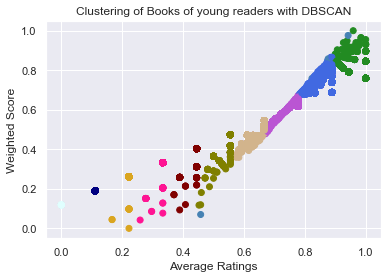

The silhouettescore with DBSCAN for the young-readers books dataset: 0.98
The calinski harabasz score with DBSCAN for the young-readers books dataset: 1510801.15
The davies bouldin score with DBSCAN for the young-readers books dataset: 0.75


In [104]:
all_books_df_y = book_ratings_w_y.copy()

def weighted_rating_all(df):
    v = df['ratings_count']
    R = df['avg_rating']
    C = df['avg_rating'].mean()
    m = df['ratings_count'].quantile(0.9)
    return (v/(v+m) * R) + (m/(m+v) * C)

all_books_df_y['weighted_score'] = weighted_rating_all(all_books_df_y)

all_books_df_y

model_df = pd.concat([rating_between_df_y, all_books_df_y['weighted_score'], all_books_df_y['avg_rating'], all_books_df_y['ratings_count']], axis=1)
model_df.head()

min_max_scaler = MinMaxScaler()
model_df_final = min_max_scaler.fit_transform(model_df)

model_dbscan_df = model_df_final.copy()

from sklearn.cluster import DBSCAN
DBSCAN_model = DBSCAN(eps=0.2, min_samples=120, algorithm='kd_tree')
DBSCAN_model.fit(model_dbscan_df)

#looks like unsupervised ML decides there are  genres
clusters_db_y = DBSCAN_model.labels_
print(np.unique(clusters_db_y))

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink',
          'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'orange', 'violet',
           'green', 'yellow', 'cyan', 'magenta', 'black', 'white', 'blue', 'steelblue']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(model_dbscan_df[:,-2], model_dbscan_df[:,-3], c=vectorizer(clusters_db_y))
plt.title("Clustering of Books of young readers with DBSCAN")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()
sc_y_db = silhouette_score(model_dbscan_df,clusters_db_y)
cal_score_y_db = calinski_harabasz_score(model_dbscan_df, clusters_db_y)
davies_y_db = davies_bouldin_score(model_dbscan_df, clusters_db_y)
print("The silhouettescore with DBSCAN for the young-readers books dataset:",np.round(sc_y_db,2))
print("The calinski harabasz score with DBSCAN for the young-readers books dataset:",np.round(cal_score_y_db,2))
print("The davies bouldin score with DBSCAN for the young-readers books dataset:",np.round(davies_y_db,2))


In [105]:
def book_recommendation_engine_dbscan_y(book_name):
    book_id = all_books_df_y[all_books_df_y['Book-Title'] == book_name ].index
    cluster_id = clusters_db_y[book_id][0]
    df_cl =pd.DataFrame(clusters_db_y,columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id']==cluster_id].index 
    books_picked = all_books_df_y.loc[book_ids]
    top_20_books_picked_dbscan = books_picked.sort_values(by ='weighted_score',ascending=False).head(20)
    recommended_books_dbscan = top_20_books_picked_dbscan[['Book-Title']]
    return recommended_books_dbscan.reset_index(drop=True)

In [106]:
books_rec_dbscan = book_recommendation_engine_dbscan_y('Prague : A Novel')
print(books_rec_dbscan)

                                           Book-Title
0                               Black as he's painted
1         Ultimate X-Men: World Tour (Ultimate X-Men)
2                          All the Women of the Bible
3   Flags: The New Compact Study Guide and Identif...
4                                   Dead Air: A Novel
5                         Friends Are Friends Forever
6                                The Jerusalem Scroll
7   Exploring The New Testament World An Illustrat...
8                 Ultimate X-Men: The Tomorrow People
9               Disney's Boo to You, Winnie the Pooh!
10  Ellen Foster (G K Hall Large Print Book Series...
11                Mary Engelbreit's bountiful harvest
12                  Breath of a Ghost (Junior Gemini)
13                                      Book of Small
14  The Resurrection of Joseph Bourne (New Canadia...
15         Love and Salt Water (New Canadian Library)
16              Essential Zen (Essential (Booksales))
17                        Le

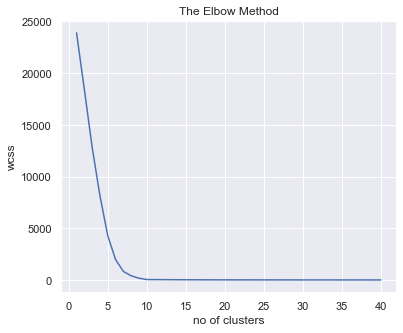

In [107]:
from sklearn.cluster import KMeans

# Elbow Method
score = []
x = model_dbscan_df
for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

# plotting the score
plt.figure(figsize=(6, 5))
plt.plot(range(1,41), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

# KMeans clustering of Books for young-readers

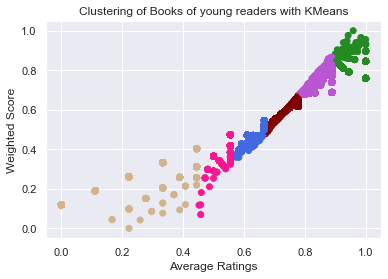

The silhouettescore with KMeans for the young-readers books dataset: 0.91
The calinski harabasz score with KMeans for the young-readers books dataset: 59590.8
The davies bouldin score with KMeans for the young-readers books dataset: 0.48


In [108]:

kmeans_y = KMeans(n_clusters=6,init='k-means++', max_iter=500)
kmeans_y.fit(model_dbscan_df)
kmeans_clusters_y = kmeans_y.labels_

plt.scatter(model_dbscan_df[:,-2], model_dbscan_df[:,-3], c=vectorizer(kmeans_clusters_y))
plt.title("Clustering of Books of young readers with KMeans")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_y_km = silhouette_score(model_dbscan_df,kmeans_clusters_y)
cal_score_y_km = calinski_harabasz_score(model_dbscan_df, kmeans_clusters_y)
davies_y_km = davies_bouldin_score(model_dbscan_df, kmeans_clusters_y)
print("The silhouettescore with KMeans for the young-readers books dataset:",np.round(sc_y_km,2))
print("The calinski harabasz score with KMeans for the young-readers books dataset:",np.round(cal_score_y_km,2))
print("The davies bouldin score with KMeans for the young-readers books dataset:",np.round(davies_y_km,2))



In [109]:
def book_recommendation_engine_kmeans_y(book_name):
    book_id = all_books_df_y[all_books_df_y['Book-Title'] == book_name ].index
    cluster_id = kmeans_clusters_y[book_id][0]
    df_cl =pd.DataFrame(kmeans_clusters_y,columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id']==cluster_id].index 
    books_picked = all_books_df_y.loc[book_ids]
    top_20_books_picked_kmeans = books_picked.sort_values(by ='weighted_score',ascending=False).head(20)
    recommended_books_kmeans = top_20_books_picked_kmeans[['Book-Title']]
    return recommended_books_kmeans.reset_index(drop=True)

books_rec_kmeans = book_recommendation_engine_kmeans_y('Red Shift')
print(books_rec_kmeans)

                                           Book-Title
0                                           Red Shift
1                                       No Safe Place
2   Learn Photography in a Weekend (Learn in a Wee...
3                                 The English Patient
4   Daddy-Long-Legs (Everyman's Library Children's...
5                                         Split Skirt
6            Dad Says He Saw You at the Mall: A Novel
7                                     Ladder of Years
8                                     An Unquiet Mind
9                           Birds of America: Stories
10                                        Gone Bamboo
11                                      West of Venus
12                                             Damage
13  The Progress Paradox : How Life Gets Better Wh...
14                    Ulysses (Vintage International)
15                                   Holidays in Hell
16            Picturing Will (Vintage Contemporaries)
17  Sexual Personae: Art and

# Agglomerative Clustering of books of young readers 

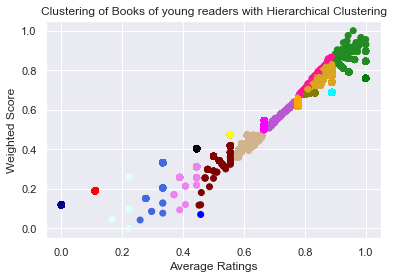

The silhouettescore with Agglomerative Clustering for the young-readers books dataset: 0.89
The calinski harabasz score with Agglomerative Clustering for the young-readers books dataset: 2866864.3
The davies bouldin score with Agglomerative Clustering for the young-readers books dataset: 0.43


In [110]:
from sklearn.cluster import AgglomerativeClustering
agglo_y = AgglomerativeClustering(n_clusters=20)
agglo_y.fit(model_dbscan_df)
agglo_clusters_y = agglo_y.labels_

plt.scatter(model_dbscan_df[:,-2], model_dbscan_df[:,-3], c=vectorizer(agglo_clusters_y))
plt.title("Clustering of Books of young readers with Hierarchical Clustering")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_y_agl = silhouette_score(model_dbscan_df,agglo_clusters_y)
cal_score_y_agl = calinski_harabasz_score(model_dbscan_df, agglo_clusters_y)
davies_y_agl = davies_bouldin_score(model_dbscan_df, agglo_clusters_y)
print("The silhouettescore with Agglomerative Clustering for the young-readers books dataset:",np.round(sc_y_agl,2))
print("The calinski harabasz score with Agglomerative Clustering for the young-readers books dataset:",np.round(cal_score_y_agl,2))
print("The davies bouldin score with Agglomerative Clustering for the young-readers books dataset:",np.round(davies_y_agl,2))


In [111]:
def book_recommendation_engine_agglo_y(book_name):
    book_id = all_books_df_y[all_books_df_y['Book-Title'] == book_name ].index
    cluster_id = agglo_clusters_y[book_id][0]
    df_cl =pd.DataFrame(agglo_clusters_y,columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id']==cluster_id].index 
    books_picked = all_books_df_y.loc[book_ids]
    top_20_books_picked_agglo = books_picked.sort_values(by ='weighted_score',ascending=False).head(20)
    recommended_books_agglo = top_20_books_picked_agglo[['Book-Title']]
    return recommended_books_agglo.reset_index(drop=True)

books_rec_agglo = book_recommendation_engine_agglo_y('The Constant Gardener')
print(books_rec_agglo)

                                           Book-Title
0    Tesis Sobre Un Homicidio (Narrativas Argentinas)
1                 A Gift of Magic (Laurel-Leaf Books)
2                                       Pure Sunshine
3                             Postcards from the Edge
4                                      Viking's Woman
5                                         RICHARD III
6                                               Wings
7                                      A Gift of Love
8                                    Moo Baa La La La
9         Companions of the Night (Laurel-Leaf Books)
10                                     Skin And Bones
11                                        The Cottage
12  COLLEGE WEEKEND: FEAR STREET #32 : COLLEGE WEE...
13                  Kit's Wilderness (Readers Circle)
14                                        Jelly Belly
15  Ghost Dance (Star Trek Voyager, No 20, Dark Ma...
16                             The Sign of the Beaver
17          Dragons in the W

In [112]:
matured_readers.head()
book_ratings_w_m = matured_readers.groupby(['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']).agg(ratings_count = ('User-ID','count'),avg_rating=('Book-Rating','mean')).round(2)
book_ratings_w_m = book_ratings_w_m.reset_index(level=['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'])
book_ratings_w_m.head(2)

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating
0,0001055607,Cereus Blooms At Night,Shani Mootoo,Fairmount Books Ltd Remainders,http://images.amazon.com/images/P/0001055607.0...,http://images.amazon.com/images/P/0001055607.0...,http://images.amazon.com/images/P/0001055607.0...,1,8.0
1,0001056107,Farmer Giles of Ham: And Other Stories,J. R. R. Tolkien,Trafalgar Square,http://images.amazon.com/images/P/0001056107.0...,http://images.amazon.com/images/P/0001056107.0...,http://images.amazon.com/images/P/0001056107.0...,1,8.0


In [113]:
# Creating rating_between new feature
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] >= 0) & (book_ratings_w_m['avg_rating'] <= 1), 'rating_between'] = "between_0_to_1"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 1) & (book_ratings_w_m['avg_rating'] <= 2), 'rating_between'] = "between_1_to_2"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 2) & (book_ratings_w_m['avg_rating'] <= 3), 'rating_between'] = "between_2_to_3"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 3) & (book_ratings_w_m['avg_rating'] <= 4), 'rating_between'] = "between_3_to_4"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 4) & (book_ratings_w_m['avg_rating'] <= 5), 'rating_between'] = "between_4_to_5"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 5) & (book_ratings_w_m['avg_rating'] <= 6), 'rating_between'] = "between_5_to_6"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 6) & (book_ratings_w_m['avg_rating'] <= 7), 'rating_between'] = "between_6_to_7"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 7) & (book_ratings_w_m['avg_rating'] <= 8), 'rating_between'] = "between_7_to_8"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 8) & (book_ratings_w_m['avg_rating'] <= 9), 'rating_between'] = "between_8_to_9"
book_ratings_w_m.loc[ (book_ratings_w_m['avg_rating'] > 9) & (book_ratings_w_m['avg_rating'] <= 10), 'rating_between'] = "between_9_to_10"


In [114]:

rating_between_df_m = book_ratings_w_m['rating_between'].str.get_dummies(sep=",")
len(rating_between_df_m)

67232

# DBSCAN Clustering of Books of matured readers

[-1  0  1  2  3  4  5  6  7  8  9]


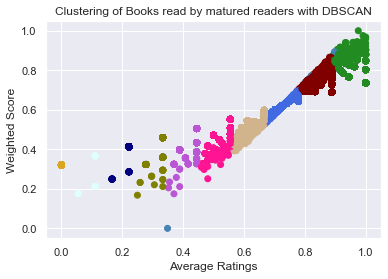

The silhouettescore with DBSCAN for the matured-readers books dataset: 0.98
The calinski harabasz score with DBSCAN for the matured-readers books dataset: 4056785.05
The davies bouldin score with DBSCAN for the matured-readers books dataset: 0.72


In [115]:
all_books_df_m = book_ratings_w_m.copy()

def weighted_rating_all(df):
    v = df['ratings_count']
    R = df['avg_rating']
    C = df['avg_rating'].mean()
    m = df['ratings_count'].quantile(0.9)
    return (v/(v+m) * R) + (m/(m+v) * C)

all_books_df_m['weighted_score'] = weighted_rating_all(all_books_df_m)

all_books_df_m

model_df = pd.concat([rating_between_df_m, all_books_df_m['weighted_score'], all_books_df_m['avg_rating'], all_books_df_m['ratings_count']], axis=1)
model_df.head()

min_max_scaler = MinMaxScaler()
model_df_final = min_max_scaler.fit_transform(model_df)

model_dbscan_df = model_df_final.copy()

from sklearn.cluster import DBSCAN
DBSCAN_model = DBSCAN(eps=0.2, min_samples=120, algorithm='kd_tree')
DBSCAN_model.fit(model_dbscan_df)

#looks like unsupervised ML decides there are  genres
clusters_db_m = DBSCAN_model.labels_
print(np.unique(clusters_db_m))

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink',
          'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'orange', 'violet',
           'green', 'yellow', 'cyan', 'magenta', 'black', 'white', 'blue', 'steelblue']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(model_dbscan_df[:,-2], model_dbscan_df[:,-3], c=vectorizer(clusters_db_m))
plt.title("Clustering of Books read by matured readers with DBSCAN")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_m_db = silhouette_score(model_dbscan_df,clusters_db_m)
cal_score_m_db = calinski_harabasz_score(model_dbscan_df, clusters_db_m)
davies_m_db = davies_bouldin_score(model_dbscan_df, clusters_db_m)
print("The silhouettescore with DBSCAN for the matured-readers books dataset:",np.round(sc_m_db,2))
print("The calinski harabasz score with DBSCAN for the matured-readers books dataset:",np.round(cal_score_m_db,2))
print("The davies bouldin score with DBSCAN for the matured-readers books dataset:",np.round(davies_m_db,2))




In [116]:
def book_recommendation_engine_dbscan_m(book_name):
    book_id = all_books_df_m[all_books_df_m['Book-Title'] == book_name ].index
    cluster_id = clusters_db_m[book_id][0]
    df_cl =pd.DataFrame(clusters_db_m,columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id']==cluster_id].index 
    books_picked = all_books_df_m.loc[book_ids]
    top_20_books_picked_dbscan = books_picked.sort_values(by ='weighted_score',ascending=False).head(20)
    recommended_books_dbscan = top_20_books_picked_dbscan[['Book-Title']]
    return recommended_books_dbscan.reset_index(drop=True)

books_rec_dbscan = book_recommendation_engine_dbscan_m('Prague : A Novel')
print(books_rec_dbscan)

                                           Book-Title
0                           The Bonesetter's Daughter
1                 Learning Red Hat Linux, 2nd Edition
2   Let Go, Let Miracles Happen: The Art of Spirit...
3   Sword of the Lamb: Book One of the Phoenix Leg...
4                                     Perilous Summer
5           Calliope's Mousepad: Women Writers Online
6                              Never Too Busy for You
7                                       A Worthy Heir
8                        Learning Perl, Third Edition
9   Weddings from the Heart: Contemporary and Trad...
10                           Windows XP in a Nutshell
11                Samba Pocket Reference, 2nd Edition
12  Thomas the Tank Engine: Cross Stitch: 20 Desig...
13  Practical Parenting: Pregnancy and Birth (Prac...
14                        Third Year at Malory Towers
15                             Adventures at Trebizon
16         Coyote Songs...Tales From The Western Road
17                          

# KMeans Clustering of books of matured readers

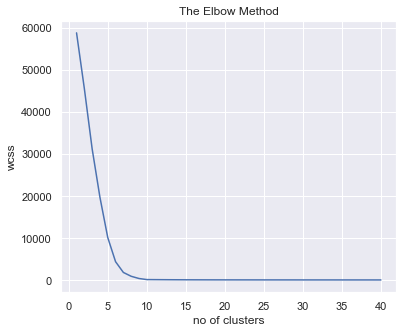

In [117]:
from sklearn.cluster import KMeans

# Elbow Method
score = []
x = model_df_final
for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

# plotting the score
plt.figure(figsize=(6, 5))
plt.plot(range(1,41), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

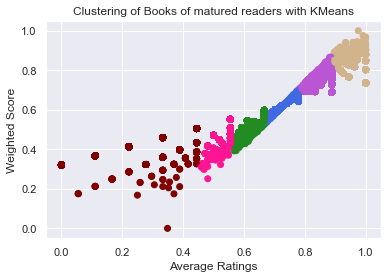

The silhouettescore with KMeans for the matured-readers books dataset: 0.92
The calinski harabasz score with KMeans for the matured-readers books dataset: 168303.43
The davies bouldin score with KMeans for the matured-readers books dataset: 0.44


In [118]:

kmeans_m = KMeans(n_clusters=6,init='k-means++', max_iter=500)
kmeans_m.fit(model_df_final)
kmeans_clusters_m = kmeans_m.labels_

plt.scatter(model_df_final[:,-2], model_df_final[:,-3], c=vectorizer(kmeans_clusters_m))
plt.title("Clustering of Books of matured readers with KMeans")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_m_km = silhouette_score(model_df_final,kmeans_clusters_m)
cal_score_m_km = calinski_harabasz_score(model_df_final, kmeans_clusters_m)
davies_m_km = davies_bouldin_score(model_df_final, kmeans_clusters_m)
print("The silhouettescore with KMeans for the matured-readers books dataset:",np.round(sc_m_km,2))
print("The calinski harabasz score with KMeans for the matured-readers books dataset:",np.round(cal_score_m_km,2))
print("The davies bouldin score with KMeans for the matured-readers books dataset:",np.round(davies_m_km,2))



In [119]:
def book_recommendation_engine_kmeans_m(book_name):
    book_id = all_books_df_m[all_books_df_m['Book-Title'] == book_name ].index
    cluster_id = kmeans_clusters_m[book_id][0]
    df_cl =pd.DataFrame(kmeans_clusters_m,columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id']==cluster_id].index 
    books_picked = all_books_df_m.loc[book_ids]
    top_20_books_picked_kmeans = books_picked.sort_values(by ='weighted_score',ascending=False).head(20)
    recommended_books_kmeans = top_20_books_picked_kmeans[['Book-Title']]
    return recommended_books_kmeans.reset_index(drop=True)

books_rec_kmeans = book_recommendation_engine_kmeans_m('Cereus Blooms At Night')
print(books_rec_kmeans)

                                           Book-Title
0   Stupid White Men ...and Other Sorry Excuses fo...
1   Balzac and the Little Chinese Seamstress : A N...
2                                          Neverwhere
3                     Angela's Ashes (MMP) : A Memoir
4   Chicken Soup for the Soul (Chicken Soup for th...
5   Politically Correct Bedtime Stories: Modern Ta...
6   The Lost Boy: A Foster Child's Search for the ...
7                                      Atlas Shrugged
8    The Eye of the World (The Wheel of Time, Book 1)
9                                      A Time to Kill
10   The Vampire Lestat (Vampire Chronicles, Book II)
11             Key of Light (Key Trilogy (Paperback))
12                Cat &amp; Mouse (Alex Cross Novels)
13                                Angels &amp; Demons
14                                         Couplehood
15                                     Pay It Forward
16  H Is for Homicide (Kinsey Millhone Mysteries (...
17                          

# Agglomerative clustering books of Matured Readers

In [120]:
agglo_m = AgglomerativeClustering(n_clusters=10)
agglo_m.fit(model_df_final)
agglo_clusters_m = agglo_m.labels_

plt.scatter(model_df_final[:,-2], model_df_final[:,-3], c=vectorizer(agglo_clusters_m))
plt.title("Clustering of Books of matured readers with Hierarchical Clustering")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_m_agl = silhouette_score(model_df_final,agglo_clusters_m)
cal_score_m_agl = calinski_harabasz_score(model_df_final, agglo_clusters_m)
davies_m_agl = davies_bouldin_score(model_df_final, agglo_clusters_m)
print("The silhouettescore with Agglomerative Clustering for the matured-readers books dataset:",np.round(sc_m_agl,2))
print("The calinski harabasz score with Agglomerative Clustering for the matured-readers books dataset:",np.round(cal_score_m_agl,2))
print("The davies bouldin score with Agglomerative Clustering for the matured-readers books dataset:",np.round(davies_m_agl,2))


In [ ]:
def book_recommendation_engine_agglo_m(book_name):
    book_id = all_books_df_m[all_books_df_m['Book-Title'] == book_name ].index
    cluster_id = agglo_clusters_m[book_id][0]
    df_cl =pd.DataFrame(agglo_clusters_m,columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id']==cluster_id].index 
    books_picked = all_books_df_m.loc[book_ids]
    top_20_books_picked_agglo = books_picked.sort_values(by ='weighted_score',ascending=False).head(20)
    recommended_books_agglo = top_20_books_picked_agglo[['Book-Title']]
    return recommended_books_agglo.reset_index(drop=True)

books_rec_agglo = book_recommendation_engine_agglo_m('The Constant Gardener')
print(books_rec_agglo)

                                           Book-Title
0   Stupid White Men ...and Other Sorry Excuses fo...
1   Balzac and the Little Chinese Seamstress : A N...
2                                          Neverwhere
3                     Angela's Ashes (MMP) : A Memoir
4   Chicken Soup for the Soul (Chicken Soup for th...
5   Politically Correct Bedtime Stories: Modern Ta...
6   The Lost Boy: A Foster Child's Search for the ...
7                                      Atlas Shrugged
8    The Eye of the World (The Wheel of Time, Book 1)
9                                      A Time to Kill
10   The Vampire Lestat (Vampire Chronicles, Book II)
11             Key of Light (Key Trilogy (Paperback))
12                Cat &amp; Mouse (Alex Cross Novels)
13                                Angels &amp; Demons
14                                         Couplehood
15                                     Pay It Forward
16  H Is for Homicide (Kinsey Millhone Mysteries (...
17                          

In [141]:
senior_readers.head()
book_ratings_w_s = senior_readers.groupby(['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']).agg(ratings_count = ('User-ID','count'),avg_rating=('Book-Rating','mean')).round(2)
book_ratings_w_s = book_ratings_w_s.reset_index(level=['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'])
book_ratings_w_s.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,1,8.0
1,000104799X,Monk's-hood,Ellis Peters,HarperCollins Publishers,http://images.amazon.com/images/P/000104799X.0...,http://images.amazon.com/images/P/000104799X.0...,http://images.amazon.com/images/P/000104799X.0...,2,7.5
2,0001048082,Made in America,Bill Bryson,HarperCollins Publishers,http://images.amazon.com/images/P/0001048082.0...,http://images.amazon.com/images/P/0001048082.0...,http://images.amazon.com/images/P/0001048082.0...,1,8.0
3,0001056107,Farmer Giles of Ham: And Other Stories,J. R. R. Tolkien,Trafalgar Square,http://images.amazon.com/images/P/0001056107.0...,http://images.amazon.com/images/P/0001056107.0...,http://images.amazon.com/images/P/0001056107.0...,1,8.0
4,0001360469,Babe Dressing,Mandy Stanley,HarperCollins Publishers,http://images.amazon.com/images/P/0001360469.0...,http://images.amazon.com/images/P/0001360469.0...,http://images.amazon.com/images/P/0001360469.0...,1,10.0


In [142]:
# Creating rating_between new feature
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] >= 0) & (book_ratings_w_s['avg_rating'] <= 1), 'rating_between'] = "between_0_to_1"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 1) & (book_ratings_w_s['avg_rating'] <= 2), 'rating_between'] = "between_1_to_2"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 2) & (book_ratings_w_s['avg_rating'] <= 3), 'rating_between'] = "between_2_to_3"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 3) & (book_ratings_w_s['avg_rating'] <= 4), 'rating_between'] = "between_3_to_4"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 4) & (book_ratings_w_s['avg_rating'] <= 5), 'rating_between'] = "between_4_to_5"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 5) & (book_ratings_w_s['avg_rating'] <= 6), 'rating_between'] = "between_5_to_6"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 6) & (book_ratings_w_s['avg_rating'] <= 7), 'rating_between'] = "between_6_to_7"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 7) & (book_ratings_w_s['avg_rating'] <= 8), 'rating_between'] = "between_7_to_8"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 8) & (book_ratings_w_s['avg_rating'] <= 9), 'rating_between'] = "between_8_to_9"
book_ratings_w_s.loc[ (book_ratings_w_s['avg_rating'] > 9) & (book_ratings_w_s['avg_rating'] <= 10), 'rating_between'] = "between_9_to_10"


In [143]:

rating_between_df_s = book_ratings_w_s['rating_between'].str.get_dummies(sep=",")
len(rating_between_df_s)

59314

# DBSCAN clustering of Books of senior readers

[-1  0  1  2  3  4  5  6  7  8]


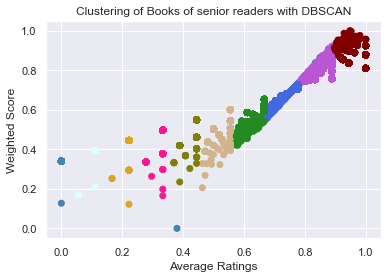

The silhouettescore with DBSCAN for the senior-readers books dataset: 0.98
The calinski harabasz score with DBSCAN for the senior-readers books dataset: 3504149.57
The davies bouldin score with DBSCAN for the senior-readers books dataset: 0.13


In [259]:
all_books_df_s = book_ratings_w_s.copy()

def weighted_rating_all(df):
    v = df['ratings_count']
    R = df['avg_rating']
    C = df['avg_rating'].mean()
    m = df['ratings_count'].quantile(0.9)
    return (v/(v+m) * R) + (m/(m+v) * C)

all_books_df_s['weighted_score'] = weighted_rating_all(all_books_df_s)

model_df = pd.concat([rating_between_df_s, all_books_df_s['weighted_score'], all_books_df_s['avg_rating'], all_books_df_s['ratings_count']], axis=1)
model_df.head()

min_max_scaler = MinMaxScaler()
model_df_final = min_max_scaler.fit_transform(model_df)

model_dbscan_df = model_df_final.copy()

from sklearn.cluster import DBSCAN
DBSCAN_model = DBSCAN(eps=0.2, min_samples=120, algorithm='kd_tree')
DBSCAN_model.fit(model_dbscan_df)

#looks like unsupervised ML decides there are  genres
clusters_db_s = DBSCAN_model.labels_
print(np.unique(clusters_db_s))

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink',
          'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'orange', 'violet',
           'green', 'yellow', 'cyan', 'magenta', 'black', 'white', 'blue', 'steelblue']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(model_dbscan_df[:,-2], model_dbscan_df[:,-3], c=vectorizer(clusters_db_s))
plt.title("Clustering of Books of senior readers with DBSCAN")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_s_db = silhouette_score(model_dbscan_df,clusters_db_s)
cal_score_s_db = calinski_harabasz_score(model_dbscan_df, clusters_db_s)
davies_s_db = davies_bouldin_score(model_dbscan_df, clusters_db_s)
print("The silhouettescore with DBSCAN for the senior-readers books dataset:",np.round(sc_s_db,2))
print("The calinski harabasz score with DBSCAN for the senior-readers books dataset:",np.round(cal_score_s_db,2))
print("The davies bouldin score with DBSCAN for the senior-readers books dataset:",np.round(davies_s_db,2))



In [260]:
def book_recommendation_engine_dbscan_s(book_name):
    book_id = all_books_df_s[all_books_df_s['Book-Title'] == book_name ].index
    cluster_id = clusters_db_s[book_id][0]
    df_cl =pd.DataFrame(clusters_db_s,columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id']==cluster_id].index 
    books_picked = all_books_df_s.loc[book_ids]
    top_20_books_picked_dbscan = books_picked.sort_values(by ='weighted_score',ascending=False).head(20)
    recommended_books_dbscan = top_20_books_picked_dbscan[['Book-Title']]
    return recommended_books_dbscan.reset_index(drop=True)

books_rec_dbscan = book_recommendation_engine_dbscan_s('Prague : A Novel')
print(books_rec_dbscan)

                                           Book-Title
0                      The companion guide to Tuscany
1            Francis Ford Coppola: A Filmmaker's Life
2                                     Midnight Cowboy
3   Irish Girls About Town: An Anthology of Short ...
4              Strange New Worlds, Vol. 6 (Star Trek)
5       The Sanctuary Seeker : A Crowner John Mystery
6   The Path Between the Seas : The Creation of th...
7                                           Athabasca
8                                         Promise Box
9                                 Stop Counting Sheep
10                         Night of the Toxic Ostrich
11                                     The God-fearer
12                                          House Gun
13                            Amaryllis Night and Day
14  Helliconia Spring : The First Book in the Hell...
15                              Aberystwyth Mon Amour
16                                      Body and Soul
17                          

# KMeans Clustering of books of senior readers

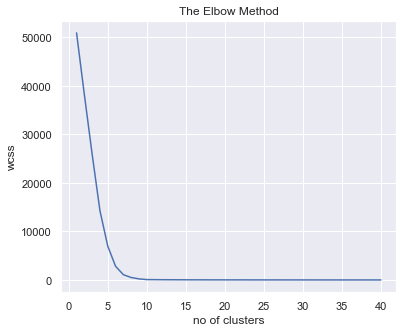

In [261]:
from sklearn.cluster import KMeans

# Elbow Method
score = []
x = model_df_final
for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

# plotting the score
plt.figure(figsize=(6, 5))
plt.plot(range(1,41), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

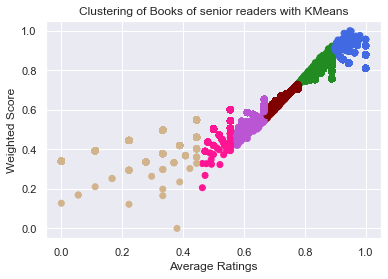

The silhouettescore with KMeans for the senior-readers books dataset: 0.94
The calinski harabasz score with KMeans for the senior-readers books dataset: 202018.22
The davies bouldin score with KMeans for the senior-readers books dataset: 0.39


In [262]:

kmeans_s = KMeans(n_clusters=6,init='k-means++', max_iter=500)
kmeans_s.fit(model_df_final)
kmeans_clusters_s = kmeans_s.labels_

plt.scatter(model_df_final[:,-2], model_df_final[:,-3], c=vectorizer(kmeans_clusters_s))
plt.title("Clustering of Books of senior readers with KMeans")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_s_km = silhouette_score(model_df_final,kmeans_clusters_s)
cal_score_s_km = calinski_harabasz_score(model_df_final, kmeans_clusters_s)
davies_s_km = davies_bouldin_score(model_df_final, kmeans_clusters_s)
print("The silhouettescore with KMeans for the senior-readers books dataset:",np.round(sc_s_km,2))
print("The calinski harabasz score with KMeans for the senior-readers books dataset:",np.round(cal_score_s_km,2))
print("The davies bouldin score with KMeans for the senior-readers books dataset:",np.round(davies_s_km,2))



In [264]:
def book_recommendation_engine_kmeans_s(book_name):
    book_id = all_books_df_s[all_books_df_s['Book-Title'] == book_name ].index
    cluster_id = kmeans_clusters_s[book_id][0]
    df_cl =pd.DataFrame(kmeans_clusters_s,columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id']==cluster_id].index 
    books_picked = all_books_df_s.loc[book_ids]
    top_20_books_picked_kmeans = books_picked.sort_values(by ='weighted_score',ascending=False).head(20)
    recommended_books_kmeans = top_20_books_picked_kmeans[['Book-Title']]
    return recommended_books_kmeans.reset_index(drop=True)

books_rec_kmeans = book_recommendation_engine_kmeans_s('Monk's-hood')
print(books_rec_kmeans)

                                           Book-Title
0                      The companion guide to Tuscany
1            Francis Ford Coppola: A Filmmaker's Life
2                                     Midnight Cowboy
3   Irish Girls About Town: An Anthology of Short ...
4              Strange New Worlds, Vol. 6 (Star Trek)
5       The Sanctuary Seeker : A Crowner John Mystery
6   The Path Between the Seas : The Creation of th...
7                                           Athabasca
8                                         Promise Box
9                                 Stop Counting Sheep
10                         Night of the Toxic Ostrich
11                                     The God-fearer
12                                          House Gun
13                            Amaryllis Night and Day
14  Helliconia Spring : The First Book in the Hell...
15                              Aberystwyth Mon Amour
16                                      Body and Soul
17                          

# Agglomerative clustering of books of senior readers

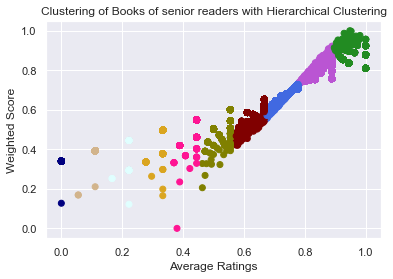

The silhouettescore with Agglomerative Clustering for the senior-readers books dataset: 0.98
The calinski harabasz score with Agglomerative Clustering for the senior-readers books dataset: 4184419.66
The davies bouldin score with Agglomerative Clustering for the senior-readers books dataset: 0.03


In [265]:
agglo_s = AgglomerativeClustering(n_clusters=10)
agglo_s.fit(model_df_final)
agglo_clusters_s = agglo_s.labels_

plt.scatter(model_df_final[:,-2], model_df_final[:,-3], c=vectorizer(agglo_clusters_s))
plt.title("Clustering of Books of senior readers with Hierarchical Clustering")
plt.xlabel("Average Ratings")
plt.ylabel("Weighted Score")
plt.show()

sc_s_agl = silhouette_score(model_df_final,agglo_clusters_s)
cal_score_s_agl = calinski_harabasz_score(model_df_final, agglo_clusters_s)
davies_s_agl = davies_bouldin_score(model_df_final, agglo_clusters_s)
print("The silhouettescore with Agglomerative Clustering for the senior-readers books dataset:",np.round(sc_s_agl,2))
print("The calinski harabasz score with Agglomerative Clustering for the senior-readers books dataset:",np.round(cal_score_s_agl,2))
print("The davies bouldin score with Agglomerative Clustering for the senior-readers books dataset:",np.round(davies_s_agl,2))


In [266]:
def book_recommendation_engine_agglo_s(book_name):
    book_id = all_books_df_s[all_books_df_s['Book-Title'] == book_name ].index
    cluster_id = agglo_clusters_s[book_id][0]
    df_cl =pd.DataFrame(agglo_clusters_s,columns=['cl_id'])
    book_ids = df_cl[df_cl['cl_id']==cluster_id].index 
    books_picked = all_books_df_s.loc[book_ids]
    top_20_books_picked_agglo = books_picked.sort_values(by ='weighted_score',ascending=False).head(20)
    recommended_books_agglo = top_20_books_picked_agglo[['Book-Title']]
    return recommended_books_agglo.reset_index(drop=True)

books_rec_agglo = book_recommendation_engine_agglo_s('The Constant Gardener')
print(books_rec_agglo)

                                           Book-Title
0                                        Mystic River
1                             Cold Mountain : A Novel
2                                         The Summons
3        White Oleander : A Novel (Oprah's Book Club)
4                                 Message in a Bottle
5                 Cat &amp; Mouse (Alex Cross Novels)
6                                   The Mulberry Tree
7   Three To Get Deadly : A Stephanie Plum Novel (...
8   Fast Food Nation: The Dark Side of the All-Ame...
9                                 All Around the Town
10                                    A Painted House
11                                        Good in Bed
12  Body of Evidence (Kay Scarpetta Mysteries (Pap...
13                                     Cradle and All
14  The Time Traveler's Wife (Today Show Book Club...
15  The Four Agreements: A Practical Guide to Pers...
16              Everything's Eventual : 14 Dark Tales
17  H Is for Homicide (Kinse